In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"

In [ ]:
dataset = ["STK","TAO","HPC","GAS","EM","FC"] # will be added soon

algo_color = {'NAIVE': 'grey',
              'SOP': '#4BACC6',
              'pMCSKY': '#1F497D',
              'OURS-Q': '#F79646',
              'OURS-D': '#9BBB59',
              'OURS': '#C0504D'}

algo_hatch = {'NAIVE': '|||',
              'SOP': '+++',
              'pMCSKY': 'xxx',
              'OURS-Q': '---',
              'OURS-D': '///',
              'OURS': '\\\\\\\\\\\\\\'}

algo_line = {'NAIVE': '-',
              'SOP': '-',
              'pMCSKY': '-',
              'OURS-Q': '--',
              'OURS-D': '--',
              'OURS': '-'}

basic_linewidth = 1.5
algo_linewidth = {'NAIVE': basic_linewidth/2,
                  'SOP': basic_linewidth/2,
                  'pMCSKY': basic_linewidth/2,
                  'OURS-Q': basic_linewidth/2,
                  'OURS-D': basic_linewidth/2,
                  'OURS': basic_linewidth}




In [8]:
def preprocessing(pathList):
    headerf = open(pathList[0]+".txt")
    header = headerf.readline()
    header = "\t".join(header.split())
    w=open("separated.csv",'w')
    w.write(header+"\n")
    for path in pathList:
        f=open(path+".txt",'r')
        i = -1
        for line in f.readlines():
            i += 1
            if (len(line.split())<9) or (i<1):
                continue
            tab_sep_line = "\t".join(line.split())
            w.write(tab_sep_line+"\n")

    w.close()
    dataframe = pd.read_csv(os.getcwd()+"/separated.csv", sep="\t")
    return dataframe   

In [9]:
df = preprocessing(dataset)
df.head()




,Dataset,Queryset,ChgQRatio,Method,Time,AvgMem,PeakMem,#Out,#OutQ
0,STK,STK_Q1,0.0,NAIVE,75.69,3.0,3.0,1235,1235
1,STK,STK_Q1,0.0,SOP,52.59,9.0,9.0,1235,1235
2,STK,STK_Q1,0.0,pMCSKY,59.03,6.0,7.0,1203,1203
3,STK,STK_Q1,0.0,OURS-Q,11.63,5.0,5.0,1235,1235
4,STK,STK_Q1,0.0,OURS-D,4.45,5.0,5.0,1235,1235


# CPU Time figure

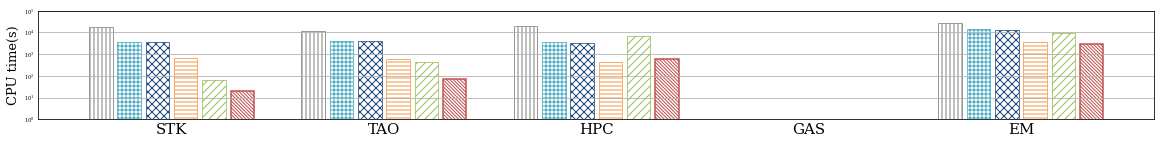

In [160]:
dataset_ = dataset # will be added soon
dataname = dataset_.pop()
graphdf = df.loc[(df["Dataset"]==dataname)&(df["Queryset"].str.contains(r"\_Q100$")) & (df['ChgQRatio']==0)].pivot(index="Dataset",columns="Method",values="Time")

for dataname in dataset_:
    graphdf = pd.concat([graphdf, df.loc[(df["Dataset"]==dataname)&(df["Queryset"].str.contains(r"\_Q100$")) & (df['ChgQRatio']==0)].pivot(index="Dataset",columns="Method",values="Time")])
graphdf = graphdf[algo_color.keys()]

graphdf = graphdf.reindex(index=dataset)

barWidth = 0.75
fontsize_tick=5
fontsize_xLabel=15
fontsize_yLabel=13

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
xpositions = []
for i, algname in enumerate(list(algo_color.keys())):
    xposition = np.arange(graphdf.shape[0])*barWidth*(graphdf.shape[0]+4) + barWidth*(1.2)*i
    center = (xposition[0]+xposition[-1])/2
    xpositions.append(xposition)
    ax.bar(xposition,graphdf.iloc[:,i].tolist(), color = "white", width=barWidth,\
           hatch=algo_hatch[algname], edgecolor=algo_color[algname], linewidth=algo_linewidth[algname])
ax.grid(b=True,which="major",axis='y',zorder=0)
ax.set_yscale("log")
ax.set_xlabel("")
ax.set_ylabel('CPU time(s)', fontsize=fontsize_yLabel)
ax.set_ylim([1,100000])
xpositions=np.array(xpositions)
plt.xticks(np.mean(xpositions,axis=0),dataset)

# TODO: Put pattern in the bar graph
plt.rcParams["figure.figsize"] = (20,2)
# remove ticks
ax.tick_params(axis ='both', which ='both', length = 0)
ax.tick_params(axis ='x', labelsize=fontsize_xLabel)
ax.tick_params(axis ='y', labelsize=fontsize_tick)
# rotate ticks
ax.tick_params(axis ='x', rotation = 0)

plt.savefig('CPU_TIME.pdf', bbox_inches='tight', format='pdf')

# Peak Memory

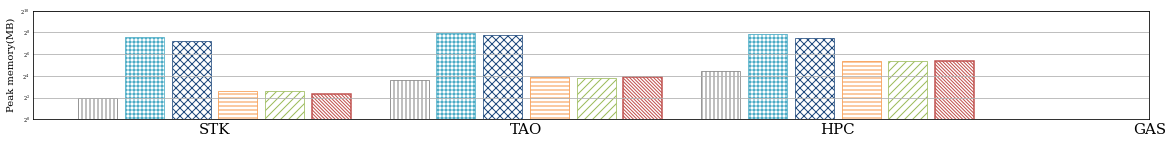

In [161]:
dataname = dataset.pop()
graphdf = df.loc[(df["Dataset"]==dataname)&(df["Queryset"].str.contains(r"\_Q100$")) & (df['ChgQRatio']==0)].pivot(index="Dataset",columns="Method",values="PeakMem")

for dataname in dataset:
    graphdf = pd.concat([graphdf, df.loc[(df["Dataset"]==dataname)&(df["Queryset"].str.contains(r"\_Q100$")) & (df['ChgQRatio']==0)].pivot(index="Dataset",columns="Method",values="PeakMem")])
graphdf = graphdf[algo_color.keys()]

graphdf = graphdf.reindex(index=dataset)

barWidth = 0.75
fontsize_tick=5
fontsize_xLabel=15
fontsize_yLabel=10

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
xpositions = []
for i, algname in enumerate(list(algo_color.keys())):
    xposition = np.arange(graphdf.shape[0])*barWidth*(graphdf.shape[0]+4) + barWidth*(1.2)*i
    center = (xposition[0]+xposition[-1])/2
    xpositions.append(xposition)
    ax.bar(xposition,graphdf.iloc[:,i].tolist(), color = "white", width=barWidth,\
           hatch=algo_hatch[algname], edgecolor=algo_color[algname], linewidth=algo_linewidth[algname])
ax.grid(b=True,which="major",axis='y',zorder=0)
ax.set_yscale("log",basey=2)
ax.set_xlabel("")
ax.set_ylabel('Peak memory(MB)', fontsize=fontsize_yLabel)
ax.set_ylim([1,1024])
xpositions=np.array(xpositions)
plt.xticks(np.mean(xpositions,axis=0),dataset)

# TODO: Put pattern in the bar graph
plt.rcParams["figure.figsize"] = (20,2)
# remove ticks
ax.tick_params(axis ='both', which ='both', length = 0)
ax.tick_params(axis ='x', labelsize=fontsize_xLabel)
ax.tick_params(axis ='y', labelsize=fontsize_tick)
# rotate ticks
ax.tick_params(axis ='x', rotation = 0)

plt.savefig('PeakMem.pdf', bbox_inches='tight', format='pdf')